<a href="https://colab.research.google.com/github/ilushaKolosov/ScienceWeek/blob/main/ScienceWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight

In [16]:
#Download libraries
!pip install tensorflow
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.1 MB/s eta 0:00:00


Epoch 1/50
192/192 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.7359 - val_loss: 0.5401 - val_accuracy: 0.7854
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.8135 - val_loss: 0.4300 - val_accuracy: 0.8417
Epoch 3/50
192/192 [==============================] - 1s 6ms/step - loss: 0.4328 - accuracy: 0.8479 - val_loss: 0.3619 - val_accuracy: 0.8458
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8661 - val_loss: 0.3293 - val_accuracy: 0.8479
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 0.3660 - accuracy: 0.8698 - val_loss: 0.3185 - val_accuracy: 0.8562
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8745 - val_loss: 0.3129 - val_accuracy: 0.8562
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8667 - val_loss: 0.3129 - val_accuracy: 0.8583
Epoch 

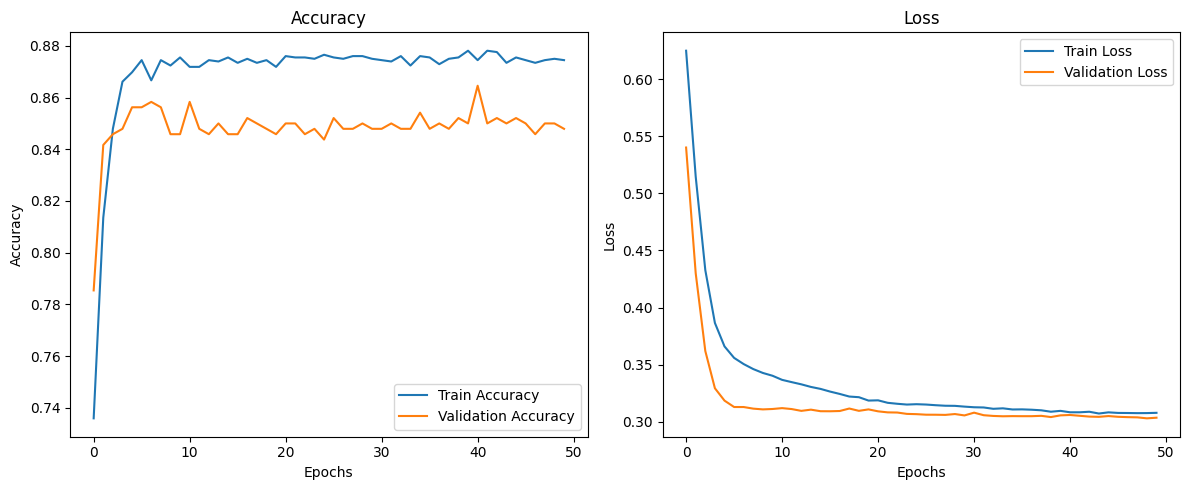

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data.csv')

# Преобразование категориальной переменной Sex в числовую
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Разделение данных на входные (X) и выходные (y)
X = data[['Height', 'Weight']].values
y = data['Sex'].values

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание модели нейросети
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Построение графиков точности и функции потерь
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
192/192 [==============================] - 3s 8ms/step - loss: 0.5319 - accuracy: 0.8042 - val_loss: 0.3625 - val_accuracy: 0.8375
Epoch 2/50
192/192 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8682 - val_loss: 0.3179 - val_accuracy: 0.8562
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3752 - accuracy: 0.8703 - val_loss: 0.3143 - val_accuracy: 0.8500
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3758 - accuracy: 0.8714 - val_loss: 0.3168 - val_accuracy: 0.8521
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.8661 - val_loss: 0.3142 - val_accuracy: 0.8479
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 0.3762 - accuracy: 0.8661 - val_loss: 0.3209 - val_accuracy: 0.8542
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8734 - val_loss: 0.3139 - val_accuracy: 0.8521
Epoch 

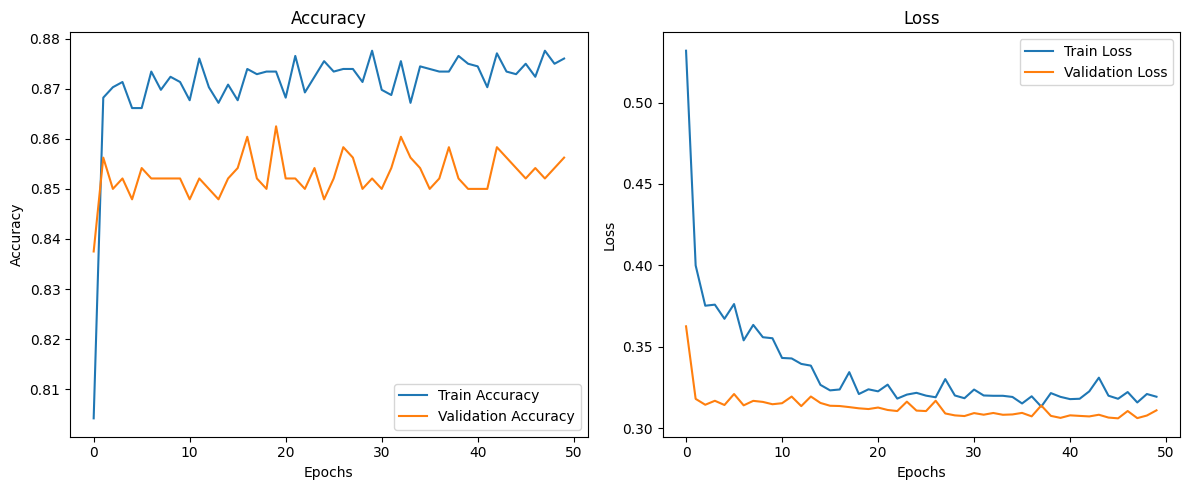

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data.csv')

# Преобразование категориальной переменной Sex в числовую
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Разделение данных на входные (X) и выходные (y)
X = data[['Height', 'Weight']].values
y = data['Sex'].values

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Добавление дополнительного измерения для использования Conv1D
X_scaled = X_scaled.reshape(-1, 2, 1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание модели сверточной нейросети
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Построение графиков точности и функции потерь
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/50
192/192 [==============================] - 15s 20ms/step - loss: 0.4127 - accuracy: 0.8307 - val_loss: 0.3177 - val_accuracy: 0.8521
Epoch 2/50
192/192 [==============================] - 2s 8ms/step - loss: 0.3605 - accuracy: 0.8589 - val_loss: 0.3287 - val_accuracy: 0.8479
Epoch 3/50
192/192 [==============================] - 2s 9ms/step - loss: 0.3480 - accuracy: 0.8604 - val_loss: 0.3189 - val_accuracy: 0.8562
Epoch 4/50
192/192 [==============================] - 2s 10ms/step - loss: 0.3383 - accuracy: 0.8557 - val_loss: 0.3137 - val_accuracy: 0.8521
Epoch 5/50
192/192 [==============================] - 2s 10ms/step - loss: 0.3329 - accuracy: 0.8651 - val_loss: 0.3152 - val_accuracy: 0.8562
Epoch 6/50
192/192 [==============================] - 1s 7ms/step - loss: 0.3333 - accuracy: 0.8667 - val_loss: 0.3374 - val_accuracy: 0.8458
Epoch 7/50
192/192 [==============================] - 1s 6ms/step - loss: 0.3338 - accuracy: 0.8635 - val_loss: 0.3095 - val_accuracy: 0.8562
Ep

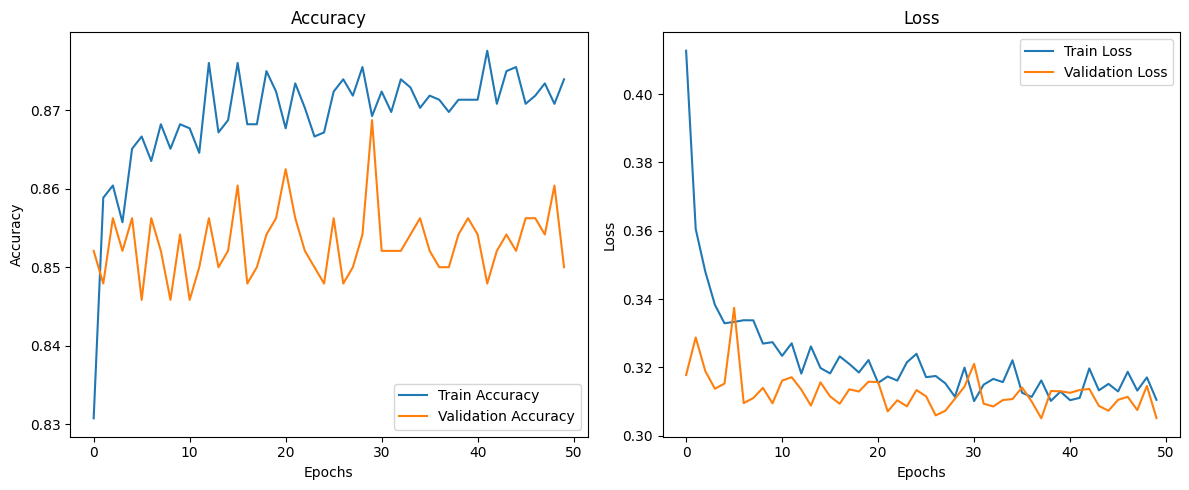

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

# Загрузка данных
data = pd.read_csv('data.csv')

# Преобразование категориальной переменной Sex в числовую
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Разделение данных на входные (X) и выходные (y)
X = data[['Height', 'Weight']].values
y = data['Sex'].values

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование входных данных для трансформера
X_train = X_train.reshape(-1, 1, 2)
X_test = X_test.reshape(-1, 1, 2)

# Создание слоя мультихэдового внимания
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.projection_dim = embed_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embed_dim)
        self.key_dense = tf.keras.layers.Dense(embed_dim)
        self.value_dense = tf.keras.layers.Dense(embed_dim)
        self.combine_heads = tf.keras.layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

# Создание трансформера блока
def transformer_block(inputs, embed_dim, num_heads, ff_dim, rate=0.1):
    attention_output = MultiHeadSelfAttention(embed_dim, num_heads)(inputs)
    attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = tf.keras.layers.Dropout(rate)(attention_output)
    add_attention = tf.keras.layers.Add()([inputs, attention_output])

    ff_output = tf.keras.layers.Dense(ff_dim, activation="relu")(add_attention)
    ff_output = tf.keras.layers.Dense(embed_dim)(ff_output)
    ff_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(ff_output)
    ff_output = tf.keras.layers.Dropout(rate)(ff_output)
    add_ff = tf.keras.layers.Add()([add_attention, ff_output])
    return add_ff

# Создание модели на основе трансформера
embed_dim = 32  # Размерность эмбеддингов
num_heads = 2   # Количество хэдов в мультихэдовом внимании
ff_dim = 32     # Размерность слоя плотных связей в FFN
inputs = tf.keras.Input(shape=(1, 2))

# Эмбеддинг
x = tf.keras.layers.Dense(embed_dim)(inputs)
x = transformer_block(x, embed_dim, num_heads, ff_dim)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Построение графиков точности и функции потерь
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
